In [1]:
pip install nsepy

In [2]:
pip install --upgrade git+https://github.com/StreamAlpha/pynse.git


  Cloning https://github.com/StreamAlpha/pynse.git to c:\users\gopal\appdata\local\temp\pip-req-build-bhf2i_vn
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/StreamAlpha/pynse.git 'C:\Users\gopal\AppData\Local\Temp\pip-req-build-bhf2i_vn'
  bash: /dev/tty: No such device or address
  error: failed to execute prompt script (exit code 1)
  fatal: could not read Username for 'https://github.com': No such file or directory
ERROR: Command errored out with exit status 128: git clone -q https://github.com/StreamAlpha/pynse.git 'C:\Users\gopal\AppData\Local\Temp\pip-req-build-bhf2i_vn' Check the logs for full command output.


# Importing libraries

Let’s look at how to forecast or predict stock prices with Machine Learning and the Python programming language. I’ll begin by importing all of the Python libraries that will require for this task:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
from pynse import *
import datetime as dt
import logging
logging.basicConfig(level=logging.DEBUG)


nse=Nse()
print(nse)

INFO:pynse.core:pyNse cache size: (7.09, 'MB').
You may want to run `nse.clear_data()` if running low on disk space.


# Data Preparation

In [10]:
df=nse.get_hist('RELIANCE',from_date=dt.date(2021,1,1),to_date=dt.date(2022,5,5))
df

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.nseindia.com:443
DEBUG:urllib3.connectionpool:https://www.nseindia.com:443 "GET / HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://www.nseindia.com:443 "GET /api/historical/cm/equity?symbol=RELIANCE&series=%5B%22EQ%22%5D&from=01-01-2021&to=26-04-2022&csv=true HTTP/1.1" 200 14715
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.nseindia.com:443
DEBUG:urllib3.connectionpool:https://www.nseindia.com:443 "GET / HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://www.nseindia.com:443 "GET /api/historical/cm/equity?symbol=RELIANCE&series=%5B%22EQ%22%5D&from=27-04-2022&to=05-05-2022&csv=true HTTP/1.1" 200 464


,open,high,low,close,volume
Date,,,,,
2021-01-01,1988.00,1997.00,1982.00,1987.50,4622002
2021-01-04,1995.10,1998.90,1968.00,1990.85,11312992
2021-01-05,1969.00,1983.60,1956.00,1966.10,11132803
2021-01-06,1965.90,1966.00,1905.15,1914.25,21414270
2021-01-07,1920.50,1945.00,1905.15,1911.15,14918406
...,...,...,...,...,...
2022-04-28,2809.95,2851.00,2786.10,2819.85,11820892
2022-04-29,2856.15,2856.15,2777.30,2790.25,8406156
2022-05-02,2762.00,2805.50,2758.05,2780.45,4369022


In [9]:
df.describe()

,open,high,low,close,volume
count,331.000000,331.000000,331.000000,331.000000,3.310000e+02
mean,2274.189728,2299.381722,2248.391390,2273.335196,7.873829e+06
std,243.371839,246.589783,240.593312,243.986326,4.557177e+06
min,1859.400000,1905.000000,1830.000000,1841.950000,7.871600e+05
25%,2071.950000,2090.450000,2040.775000,2065.050000,4.987274e+06
50%,2255.000000,2292.900000,2240.300000,2258.150000,6.568539e+06
75%,2452.000000,2486.500000,2425.050000,2461.475000,9.403385e+06
max,2856.150000,2856.150000,2786.100000,2819.850000,4.220969e+07


In [13]:
X = df[['high','low','open','volume']].values
y = df['close'].values
print(X)

[[1.9970000e+03 1.9820000e+03 1.9880000e+03 4.6220020e+06]
 [1.9989000e+03 1.9680000e+03 1.9951000e+03 1.1312992e+07]
 [1.9836000e+03 1.9560000e+03 1.9690000e+03 1.1132803e+07]
 ...
 [2.8055000e+03 2.7580500e+03 2.7620000e+03 4.3690220e+06]
 [2.7900000e+03 2.6763000e+03 2.7850000e+03 8.8827920e+06]
 [2.7300000e+03 2.6320000e+03 2.7235000e+03 7.9427210e+06]]


In [15]:
print(y)

[1987.5  1990.85 1966.1  1914.25 1911.15 1933.7  1897.25 1957.05 1938.8
 1960.6  1937.45 1983.95 2016.4  2054.7  2099.4  2049.6  1941.   1895.
 1876.55 1841.95 1895.3  1925.8  1930.65 1924.3  1923.75 1951.45 1956.15
 1974.3  2055.7  2041.6  2032.6  2059.5  2083.25 2067.7  2080.3  2008.1
 2023.45 2061.   2144.35 2085.8  2101.7  2106.   2202.1  2175.85 2178.7
 2191.1  2191.05 2181.95 2137.6  2108.9  2100.6  2055.35 2009.1  2082.
 2062.4  2087.5  2047.3  1991.45 1994.65 2029.3  2003.1  2021.85 1992.6
 1984.3  2002.85 2005.35 1982.05 1911.15 1931.8  1944.3  1932.1  1901.7
 1901.15 1906.4  1904.35 1937.85 1988.65 1997.3  2024.05 1994.5  1959.05
 1916.6  1920.1  1931.   1931.75 1926.2  1933.15 1913.15 1937.3  1960.35
 1987.95 1997.05 1985.4  2002.55 1985.65 1963.15 1970.05 1976.1  2094.8
 2160.3  2168.9  2201.25 2209.65 2190.5  2227.4  2214.6  2175.   2183.
 2213.15 2244.9  2250.   2211.6  2215.65 2225.65 2237.25 2225.75 2205.35
 2153.5  2104.45 2086.   2087.8  2110.65 2097.95 2129.05 2150.2

# Applying Machine Learning Algorithms for stock market prediction

To be effective, machine learning models require at least two types of data: training data and testing data. Given the difficulty of obtaining new data, a frequent method for generating these subsets of data is to divide a single dataset into many groups that we are using for Stock Price Prediction using Machine Learning.

It is typical to use Seventy percent of the data for training and the remaining thirty percent for testing. The most frequent strategy is a 70/30 split, however, other formulaic ways can also be utilized.

In [16]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

We can see that our data has been split into several DataFrame objects, with the nearest whole-number value of rows reflecting our 70/30 split. The test size of 0.30 (30%) was supplied as a parameter to the train test split method.

# Training the Model

In [17]:
#from sklearn.linear_model import LinearRegression
# Create Regression Model 
Model = LinearRegression()

# Train the model
Model.fit(X_train, y_train)
#Printing Coefficient
print(Model.coef_)

# Use model to make predictions
predicted = Model.predict(X_test) 
print(predicted)

[ 8.32617949e-01  7.72092993e-01 -6.04829869e-01  3.93429528e-07]
[2028.34404023 2369.09907833 2478.75125209 2670.16095448 2381.95159992
 2395.47691912 1993.0301662  2594.16378652 1951.18903378 2573.40424249
 2584.98923217 1930.20660058 1982.78722602 2469.35273152 2506.22071651
 2177.60764261 2556.07480026 2413.95335528 1904.38728892 2101.76488019
 2520.76600391 2093.03840634 2209.46364358 2225.52776412 2213.75151354
 1909.7208797  2611.15511648 1970.76045897 2358.82170223 2394.37828455
 2102.61643809 2406.3909276  2441.46358988 2202.10185659 2543.69462003
 2126.22100198 2211.73802564 2648.03054556 1989.89490809 2511.64651877
 1966.7596948  2792.07768524 2574.75002383 2296.02002093 2215.02499098
 2471.72581632 2026.00795727 1958.28052553 2002.41749098 2656.584657
 1999.2610786  2044.0839408  2004.33065513 2553.66425037 2644.18236806
 2421.22051105 2693.20969257 1929.37696615 2397.03826688 2362.2502643
 2538.09184881 2703.91826825 2368.99502846 2079.24497567 1958.71973278
 1896.65226765

That’s it; our linear model has been trained, and we’ve obtained predicted values (y pred). Now we can examine our model coefficients as well as statistics such as the mean absolute error (MAE) and coefficient of determination to see how well our model fits our data (r2).

In [18]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data1.head(20)

,Actual,Predicted
0,2029.30,2028.344040
1,2378.70,2369.099078
2,2482.70,2478.751252
3,2667.80,2670.160954
4,2389.00,2381.951600
5,2404.70,2395.476919
6,1985.40,1993.030166
7,2609.20,2594.163787
8,1960.35,1951.189034
9,2572.40,2573.404242


# Validating the fit

In [19]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 9.407286889875712
Mean Squared Error: 147.14414836983343
Root Mean Squared Error: 12.13029877496154


In [45]:
from sklearn.metrics import r2_score  
R_square = r2_score(data1['Actual'], data1['Predicted']) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.9974780037561748


# Visualisation

<AxesSubplot:>

<Figure size 720x504 with 0 Axes>

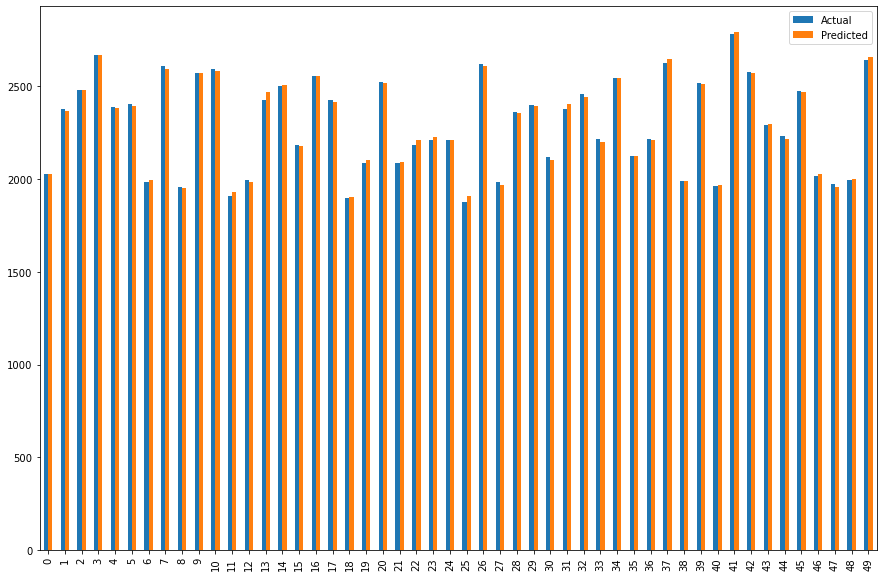

In [40]:
fig = plt.figure(figsize =(10, 7))
graph = data1.head(50)
graph.plot(kind='bar',figsize=(15,10))
